In [38]:
# install only when you restart the session

!pip install category_encoders

^C


In [ ]:
# @title # Importing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib
import seaborn as sns
import category_encoders as ce

from scipy import stats
from scipy.stats import skew
import statsmodels.api as sm

%matplotlib inline

In [ ]:
# @title # Functions

# define a function where we pass the new width
# do load me

title_font = {'fontname': 'serif'}
label_font = {'fontname': 'monospace'}

def Width(ax, new_width: float):
    
    """ 
    sets the width for the bar or bar type plots.
    ax: matplotlib axes
    new_width: width_size

    """ 
    for patch in ax.patches:
        current_width = patch.get_width()
        difference = current_width - new_width

        # set new width
        patch.set_width(new_width)

        # Now Recenter the Bars
        patch.set_x(patch.get_x() + difference * .5)

def display_scores(scores):
    print(f"Scores: {scores}")
    print(f"Scores, Mean: {scores.mean()}")
    print(f"Standard Deviation: {scores.std()}")


# def find_outliers(df):
#     q1 = df.quantile(0.25)
#     q3 = df.quantile(0.75)

#     iqr = q3 - q1

#     outliers = df.loc[(df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr))]

#     return outliers

def identify_outliers_iqr(group):
    q1, q3 = np.percentile(group['Price'], [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = group[(group['Price'] < lower_bound) | (group['Price'] > upper_bound)]
    return outliers

In [ ]:
# def find_outliers(df):
#     q1 = df.quantile(0.25)
#     q3 = df.quantile(0.75)

#     iqr = q3 - q1

#     outliers = df.loc[(df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr))]

#     return outliers

def identify_outliers_iqr(group):
    q1, q3 = np.percentile(group['Price'], [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = group[(group['Price'] < lower_bound) | (group['Price'] > upper_bound)]
    return outliers

In [ ]:
prop_data = pd.read_csv("/content/drive/MyDrive/Dataset/bd_housing_data/property_listing_data_in_Bangladesh_new_mod1.csv")

In [ ]:
prop_data.head()

,Beds,Baths,TotalRooms,Area,Type,Address,Sector_or_Block,Region,Town,City,Price
0,3,4,7,2200,Apartment,"Block A, Bashundhara R-A, Dhaka",Block A,Bashundhara R-A,Bashundhara R-A,Dhaka,50000.0
1,3,4,7,1400,Apartment,"South Khulshi, Khulshi, Chattogram",No Sector/Block,South Khulshi,Khulshi,Chattogram,30000.0
2,3,4,7,1950,Apartment,"Block F, Bashundhara R-A, Dhaka",Block F,Bashundhara R-A,Bashundhara R-A,Dhaka,30000.0
3,3,3,6,2000,Apartment,"Sector 9, Uttara, Dhaka",Sector 9,Uttara,Uttara,Dhaka,35000.0
4,3,4,7,1650,Apartment,"Block I, Bashundhara R-A, Dhaka",Block I,Bashundhara R-A,Bashundhara R-A,Dhaka,25000.0


In [ ]:
prop_data.drop(['Address', 'Sector_or_Block'], axis=1, inplace=True)

In [ ]:
prop_data.head(3)

,Beds,Baths,TotalRooms,Area,Type,Region,Town,City,Price
0,3,4,7,2200,Apartment,Bashundhara R-A,Bashundhara R-A,Dhaka,50000.0
1,3,4,7,1400,Apartment,South Khulshi,Khulshi,Chattogram,30000.0
2,3,4,7,1950,Apartment,Bashundhara R-A,Bashundhara R-A,Dhaka,30000.0


In [ ]:
prop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7557 entries, 0 to 7556
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Beds        7557 non-null   int64  
 1   Baths       7557 non-null   int64  
 2   TotalRooms  7557 non-null   int64  
 3   Area        7557 non-null   int64  
 4   Type        7557 non-null   object 
 5   Region      7557 non-null   object 
 6   Town        7557 non-null   object 
 7   City        7557 non-null   object 
 8   Price       7557 non-null   float64
dtypes: float64(1), int64(4), object(4)
memory usage: 531.5+ KB


In [ ]:
round(prop_data.describe(), 2)

,Beds,Baths,TotalRooms,Area,Price
count,7557.00,7557.00,7557.00,7557.00,7557.00
mean,2.75,2.69,5.45,1372.03,34079.03
std,0.98,0.90,1.74,956.76,64711.61
min,1.00,1.00,2.00,300.00,5500.00
25%,2.00,2.00,4.00,900.00,15000.00
50%,3.00,3.00,6.00,1200.00,19000.00
75%,3.00,3.00,6.00,1550.00,30000.00
max,36.00,10.00,46.00,31500.00,2000000.00


In [ ]:
numericals = list(prop_data.select_dtypes(include=np.number))
categoricals = list(prop_data.select_dtypes(exclude=np.number))

In [ ]:
print(numericals)
print(categoricals)

['Beds', 'Baths', 'TotalRooms', 'Area', 'Price']
['Type', 'Region', 'Town', 'City']


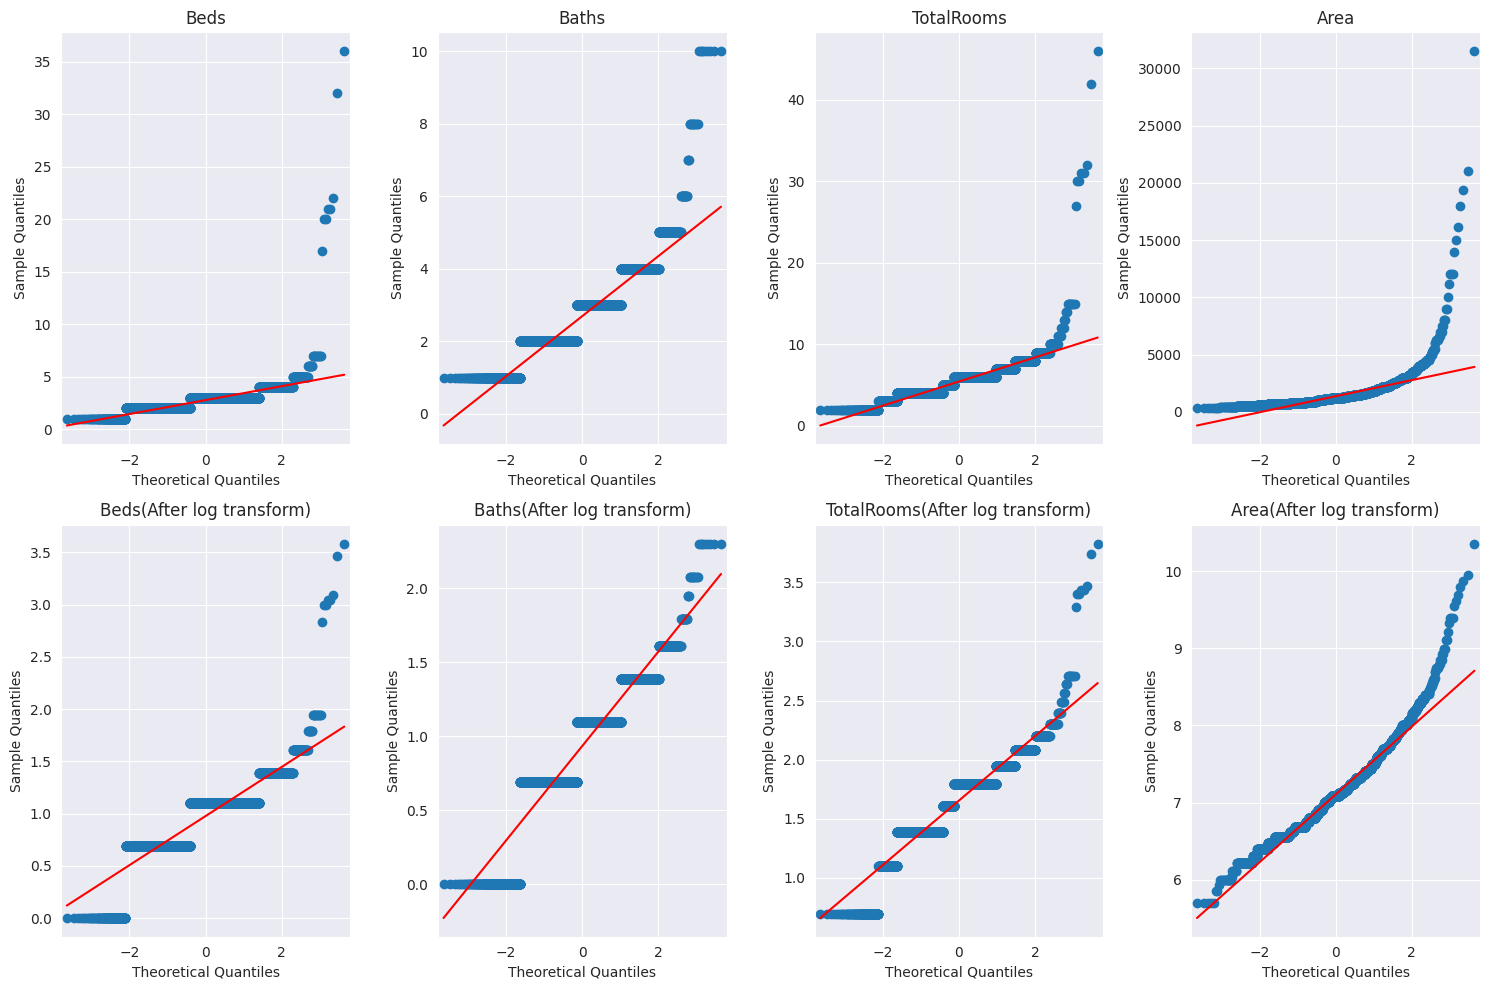

In [ ]:
with sns.axes_style('darkgrid'):
    figure, axes = plt.subplots(nrows=2, ncols=len(numericals)-1, figsize=(15, 10))

    for i, num_cols in enumerate(numericals[:-1]):
        fig = sm.qqplot(prop_data[num_cols], line='r', ax=axes[0, i])
        axes[0, i].set_title(num_cols)
        fig1 = sm.qqplot(np.log(prop_data[num_cols]), line='r', ax=axes[1, i])
        axes[1, i].set_title(num_cols + "(After log transform)")
    plt.tight_layout()
plt.show()


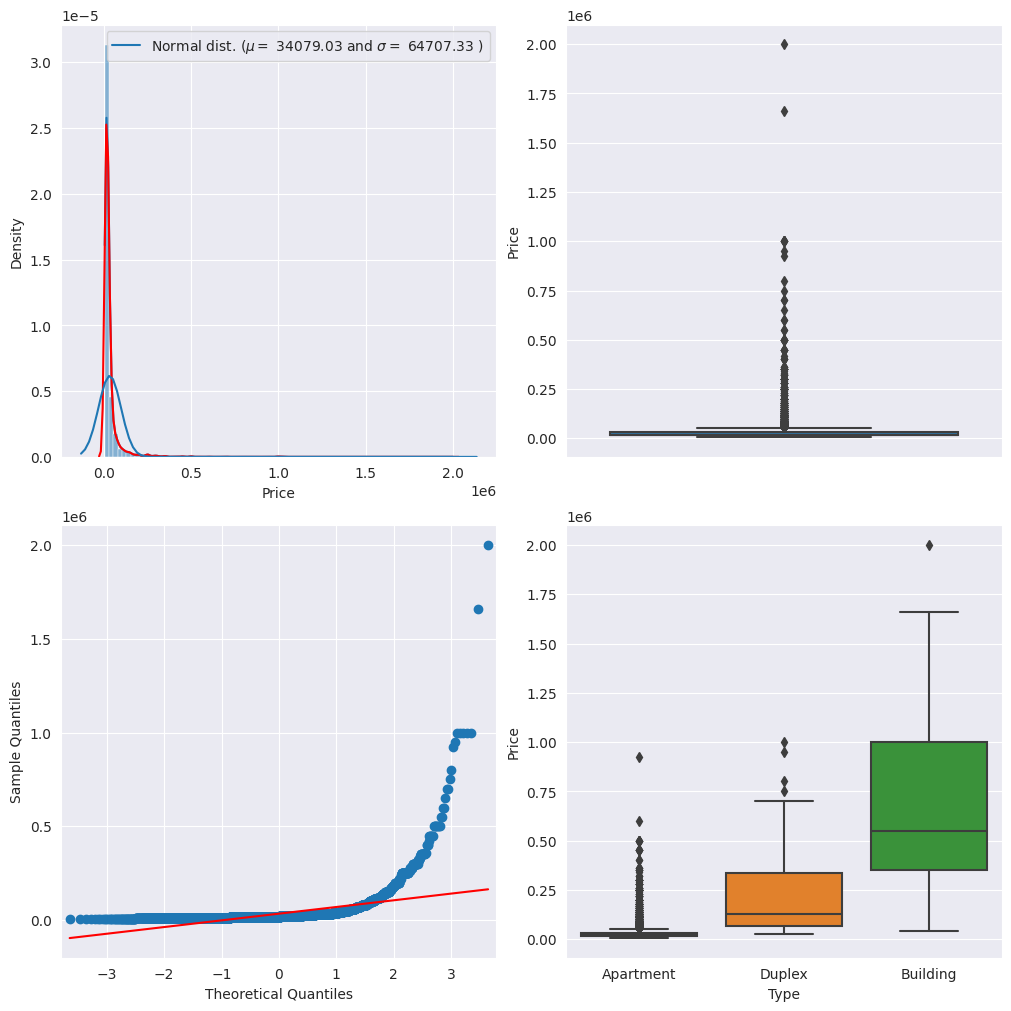


Skewness: 11.546127
Kurtosis: 225.387443


In [ ]:
with sns.axes_style("darkgrid"):
    fig, axes = plt.subplot_mosaic([['upper left', 'upper right'],
                               ['lower left', 'lower right']],
                              figsize=(10, 10), layout="constrained")
    fig = sns.histplot(prop_data['Price'], bins=80, stat='density', kde=True, ax=axes['upper left'])
    sns.kdeplot(data=prop_data, x="Price", color='red', ax=axes['upper left'])
    mu, std = stats.norm.fit(prop_data['Price'])
    
    xx = np.linspace(*axes['upper left'].get_xlim(), 100)
    axes['upper left'].plot(xx, stats.norm.pdf(xx, mu, std));
    axes['upper left'].legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, std)],
            loc='best')
    
    # fig = plt.figure()
    # res = stats.probplot(prop_data['Price'], plot=plt)
    # plt.show()
    fig2 = sm.qqplot(prop_data['Price'], line='r', ax=axes['lower left'])
    # plt.show()
    # plt.tight_layout()

    fig3 = sns.boxplot(data=prop_data, y='Price', ax=axes['upper right'])
    # plt.tight_layout()

    fig4 = sns.boxplot(data=prop_data, x='Type', y='Price', ax=axes['lower right'])
    plt.show()

    print("\nSkewness: %f" % prop_data['Price'].skew())
    print("Kurtosis: %f" % prop_data['Price'].kurt())

In [ ]:
skewed_feats = prop_data[numericals[:-1]].apply(lambda x: skew(x))\
                                                        .sort_values(ascending=False)

skewness = pd.DataFrame({'skewed_features': skewed_feats})
skewness

,skewed_features
Beds,13.542347
Area,10.026988
TotalRooms,5.556958
Baths,1.159457


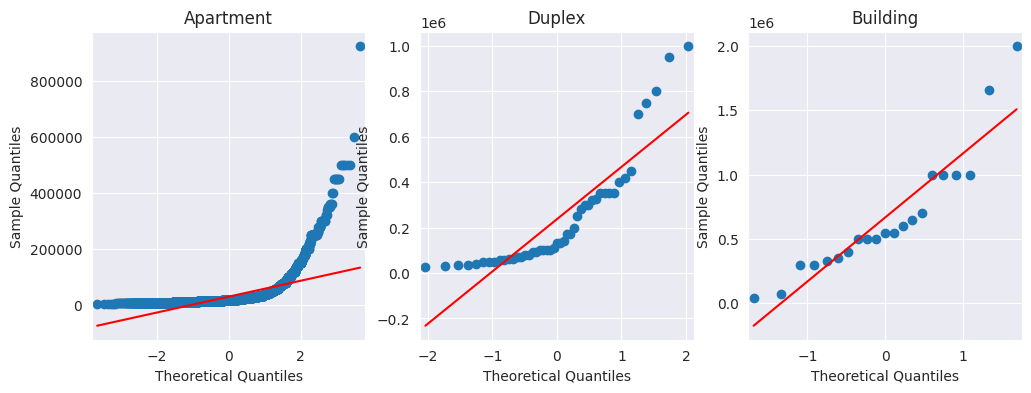

In [ ]:
with sns.axes_style('darkgrid'):
    figure, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

    for i, types in enumerate(prop_data['Type'].unique()):
        fig = sm.qqplot(prop_data.loc[prop_data['Type'] == types]['Price'], line='r', ax=axes[i])
        axes[i].set_title(str(types))
    
    plt.show()

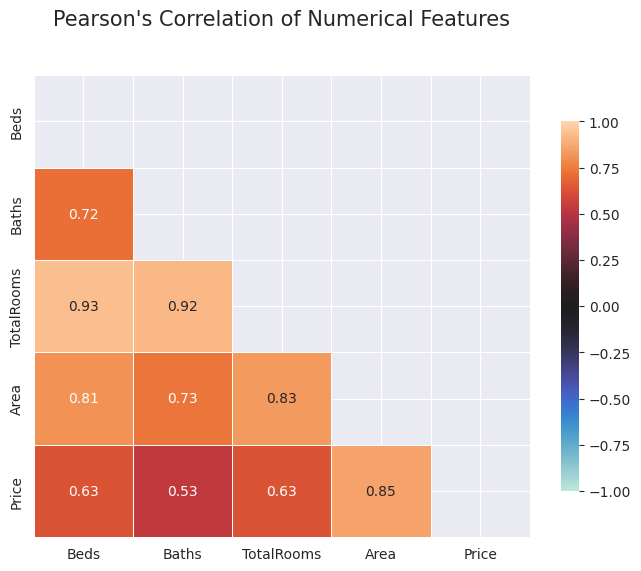

In [ ]:
prop_data_ = prop_data[numericals]
corr = prop_data_.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool))

with sns.axes_style('darkgrid'):
    figure, axes = plt.subplots(figsize=(8, 6))
    fig = sns.heatmap(corr, mask=mask,
                      vmax=1.0, vmin=-1.0,
                      center=0, annot=True,
                      square=False, 
                      linewidth=.5, 
                      cbar_kws={'shrink': 0.8}
                      )
    axes.set_title("Pearson's Correlation of Numerical Features", fontsize=15, y=1.09)

# Model Training

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
import joblib

## Mean Encoding

In [ ]:
def mean_encode(df, columns, mean_with):

    df_mean_enc = df.copy()

    for col in columns:

        mean_enc = df_mean_enc.groupby(col)[mean_with].mean()
        # mean_enc_region = prop_data_mean_enc.groupby('Region')['Price'].mean()

        df_mean_enc.loc[:, col + "_mean_enc"] = df_mean_enc[col].map(mean_enc)
        # prop_data_mean_enc.loc[:, "Region_mean_enc"] = prop_data_mean_enc["Region"].map(mean_enc_region)
    return df_mean_enc

In [ ]:
prop_data_mean_enc = mean_encode(prop_data, ['Town', 'Region'], 'Price')

In [ ]:
prop_data_mean_enc.head(3)
print(prop_data_mean_enc.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7557 entries, 0 to 7556
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Beds             7557 non-null   int64  
 1   Baths            7557 non-null   int64  
 2   TotalRooms       7557 non-null   int64  
 3   Area             7557 non-null   int64  
 4   Type             7557 non-null   object 
 5   Region           7557 non-null   object 
 6   Town             7557 non-null   object 
 7   City             7557 non-null   object 
 8   Price            7557 non-null   float64
 9   Town_mean_enc    7557 non-null   float64
 10  Region_mean_enc  7557 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 649.6+ KB
None


In [ ]:
transformer = ColumnTransformer(
    transformers=[
        ("bin_encoder", OrdinalEncoder(dtype=np.int32), ['Type', 'City']),
        ('numerical', StandardScaler(), numericals[:-1]),
        ('_', 'drop', ['Region', 'Town'])],
    remainder='passthrough',
    verbose_feature_names_out=False
)

In [ ]:
prop_data_transformed = transformer.fit_transform(prop_data_mean_enc.copy())

In [ ]:
prop_data_transformed

array([[ 0.00000000e+00,  1.00000000e+00,  2.51647329e-01, ...,
         5.00000000e+04,  4.19939577e+04,  4.19242424e+04],
       [ 0.00000000e+00,  0.00000000e+00,  2.51647329e-01, ...,
         3.00000000e+04,  4.03400722e+04,  3.46986301e+04],
       [ 0.00000000e+00,  1.00000000e+00,  2.51647329e-01, ...,
         3.00000000e+04,  4.19939577e+04,  4.19242424e+04],
       ...,
       [ 0.00000000e+00,  1.00000000e+00, -7.72974905e-01, ...,
         2.20000000e+04,  3.29274218e+04,  3.59721782e+04],
       [ 0.00000000e+00,  1.00000000e+00,  2.51647329e-01, ...,
         1.75000000e+05,  1.73848780e+05,  1.50724638e+05],
       [ 0.00000000e+00,  1.00000000e+00,  1.27626956e+00, ...,
         9.00000000e+04,  7.44857143e+04,  7.44857143e+04]])

In [ ]:
transformer.get_feature_names_out()

array(['Type', 'City', 'Beds', 'Baths', 'TotalRooms', 'Area', 'Price',
       'Town_mean_enc', 'Region_mean_enc'], dtype=object)

In [ ]:
prop_data_transformed = pd.DataFrame(prop_data_transformed, columns=transformer.get_feature_names_out())

In [ ]:
prop_data_transformed.head(3)

,Type,City,Beds,Baths,TotalRooms,Area,Price,Town_mean_enc,Region_mean_enc
0,0.0,1.0,0.251647,1.449989,0.89244,0.865455,50000.0,41993.957704,41924.242424
1,0.0,0.0,0.251647,1.449989,0.89244,0.029241,30000.0,40340.072202,34698.630137
2,0.0,1.0,0.251647,1.449989,0.89244,0.604138,30000.0,41993.957704,41924.242424


In [ ]:
prop_data_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7557 entries, 0 to 7556
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             7557 non-null   float64
 1   City             7557 non-null   float64
 2   Beds             7557 non-null   float64
 3   Baths            7557 non-null   float64
 4   TotalRooms       7557 non-null   float64
 5   Area             7557 non-null   float64
 6   Price            7557 non-null   float64
 7   Town_mean_enc    7557 non-null   float64
 8   Region_mean_enc  7557 non-null   float64
dtypes: float64(9)
memory usage: 531.5 KB


In [ ]:
rs = 11

In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_val_set = train_test_split(prop_data_transformed, test_size=0.15,
                                           random_state=rs, stratify=prop_data_transformed['Type'])


val_set, test_set = train_test_split(test_val_set, test_size=0.5,
                                     random_state=rs)

X_train, y_train = train_set.drop('Price', axis=1), train_set.loc[:, 'Price']
X_val, y_val = val_set.drop('Price', axis=1), val_set.loc[:, 'Price']
X_test, y_test = test_set.drop('Price', axis=1), test_set.loc[:, 'Price']

Applying transformation on the Price

In [ ]:
# We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
y_train1p = np.log1p(y_train.astype(int))

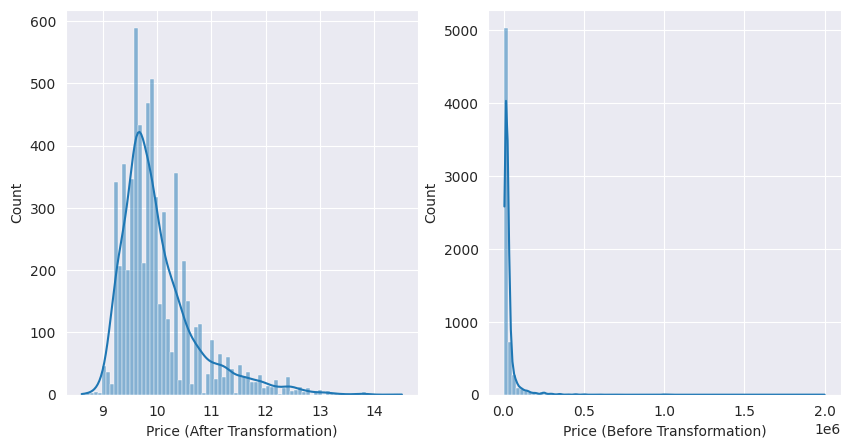

In [ ]:
with sns.axes_style("darkgrid"):
    figure, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

    fig1 = sns.histplot(y_train1p, ax=axes[0], bins=80, kde=True)
    axes[0].set_xlabel('Price (After Transformation)')
    fig2 = sns.histplot(y_train, ax=axes[1], bins=80, kde=True)
    axes[1].set_xlabel('Price (Before Transformation)')
    plt.show()

In [ ]:
def score_summary(regressors, k, train_X, train_y):
    # cols = ['Regressor', 'val_rmse']
    # data_table = pd.DataFrame(columns=cols)
    kf = k

    for reg in regressors:
        rmse = np.sqrt(-cross_val_score(reg, train_X, train_y, scoring='neg_mean_squared_error', cv=kf))
        print(f"\n{str(reg)}, 'Mean encoded, score: Mean ({rmse.mean(): .4f}) Std ({rmse.std(): .4f})")

# def model_score(regressors, train_X, train_y, val_X, val_y):
#     cols = ['Regressor', 'val_rmse']
#     # data_table=pd.DataFrame(columns=cols)

#     for reg in regressors:
#         reg.fit(train_X, train_y)
#         val_predict = reg.predict(val_X)

In [ ]:
regs = [DecisionTreeRegressor(random_state=rs),
        RandomForestRegressor(random_state=rs),
        SVR(),
        Lasso(alpha=0.005, random_state=rs, max_iter=10000),
        ElasticNet(alpha=0.005, l1_ratio=.9, random_state=rs, max_iter=10000),
        GradientBoostingRegressor(random_state=rs),
        xgb.XGBRegressor(random_state=rs),
        lgb.LGBMRegressor(objective='regression')]

names = ['svr', 'lasso', 'Enet', 'gbr', 'xgb', 'lgb']

In [ ]:
kf = 5
score_summary(regs, kf, X_train, y_train1p)


DecisionTreeRegressor(random_state=11), 'Mean encoded, score: Mean ( 0.2403) Std ( 0.0188)

RandomForestRegressor(random_state=11), 'Mean encoded, score: Mean ( 0.2058) Std ( 0.0178)

SVR(), 'Mean encoded, score: Mean ( 0.3737) Std ( 0.0050)

Lasso(alpha=0.005, max_iter=10000, random_state=11), 'Mean encoded, score: Mean ( 0.3101) Std ( 0.0213)

ElasticNet(alpha=0.005, l1_ratio=0.9, max_iter=10000, random_state=11), 'Mean encoded, score: Mean ( 0.3099) Std ( 0.0213)

GradientBoostingRegressor(random_state=11), 'Mean encoded, score: Mean ( 0.2095) Std ( 0.0144)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             ma

Model Tryouts! 

RandomForestRegressor,
SVR, 
XGBregressor,
LGMRegressor

## RandomForestRegressor

In [ ]:
rf_reg = RandomForestRegressor(random_state=rs)
rf_reg.fit(X_train, y_train1p)

RandomForestRegressor(random_state=11)

In [ ]:
rf_pred = np.expm1(rf_reg.predict(X_val))

In [ ]:
print(f"MAE:     {mean_absolute_error(y_val, rf_pred)}")
print(f"RMSE:    {np.sqrt(mean_squared_error(y_val, rf_pred))}")

MAE:     5831.076848031495
RMSE:    18431.269711072517


In [ ]:
print(f"Actual Price \t Predicted Price")
for val, pred_val in zip(y_val[20:50], rf_pred[20:50]):
    print(f"{val} \t {pred_val}")

Actual Price 	 Predicted Price
65000.0 	 29268.564632648693
25000.0 	 27407.750625868677
11000.0 	 10403.92878161275
20000.0 	 24780.038242865598
25000.0 	 32297.50293520428
17000.0 	 17004.2502140042
15000.0 	 14672.785751578882
22000.0 	 20595.03584226082
10000.0 	 10408.11689412808
30000.0 	 29999.99999999999
28000.0 	 22575.91050103642
19000.0 	 18803.46042659341
15000.0 	 12734.050150117917
14000.0 	 14033.154313876947
15000.0 	 14803.11070837561
18000.0 	 18744.001464473393
21000.0 	 28175.903613177616
17000.0 	 17077.18823537581
22000.0 	 21900.82555099333
13500.0 	 13831.232705942017
20000.0 	 20157.16386600312
150000.0 	 176100.80384256828
16000.0 	 16209.279699735318
26000.0 	 24242.314329522167
16000.0 	 15351.37700998946
20000.0 	 18744.848878114626
18000.0 	 20040.5925413267
22000.0 	 16521.02901992864
12000.0 	 13470.058205518373
14000.0 	 16288.97053857647


>>> So there are a few mistakes here and there (Well that should happen) but overall it's looks good. We can optimzed this even more by tweaking the parameters

In [ ]:
scoring = 'neg_mean_absolute_error'
param_grid = {"n_estimators": range(50, 300, 50), 
              "criterion": ["squared_error", "poisson", "absolute_error"],
              "max_depth": [None, 20, 30, 40, 50],
              "min_samples_split": [2, 3, 4, 5],
              }

In [ ]:
gs = GridSearchCV(RandomForestRegressor(random_state=rs), param_grid, 
                  scoring=scoring, cv=3, n_jobs=-1, refit=True)

In [ ]:
gs.fit(X_train, y_train1p)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=11), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'poisson',
                                       'absolute_error'],
                         'max_depth': [None, 20, 30, 40, 50],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': range(50, 300, 50)},
             scoring='neg_mean_absolute_error')

In [ ]:
joblib.dump(gs, '/content/drive/MyDrive/Dataset/bd_housing_data/gridsearch_rf_0_1_0.joblib')

['/content/drive/MyDrive/Dataset/bd_housing_data/gridsearch_rf_0_1_0.joblib']

In [ ]:
joblib.load('/content/drive/MyDrive/Dataset/bd_housing_data/gridsearch_rf_0_1_0.joblib')

FileNotFoundError: ignored

In [ ]:
results = gs.cv_results_
for mean_score, params in zip(results['mean_test_score'], results['params']):
    print(-mean_score, params)

0.13590906920763898 {'criterion': 'squared_error', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
0.13544585394480702 {'criterion': 'squared_error', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
0.13521120767062542 {'criterion': 'squared_error', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 150}
0.13518452766526 {'criterion': 'squared_error', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
0.13507620991472508 {'criterion': 'squared_error', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 250}
0.13539503290746815 {'criterion': 'squared_error', 'max_depth': None, 'min_samples_split': 3, 'n_estimators': 50}
0.13494509959932532 {'criterion': 'squared_error', 'max_depth': None, 'min_samples_split': 3, 'n_estimators': 100}
0.134745703941941 {'criterion': 'squared_error', 'max_depth': None, 'min_samples_split': 3, 'n_estimators': 150}
0.1347707145985302 {'criterion': 'squared_error', 'max_depth': None, 'min_samples_split

In [ ]:
print(gs.best_estimator_)
print(gs.best_params_)
print(gs.best_score_)

RandomForestRegressor(criterion='absolute_error', max_depth=20,
                      min_samples_split=5, n_estimators=250, random_state=11)
{'criterion': 'absolute_error', 'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 250}
-0.13204234130180795


In [ ]:
results.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_criterion', 'param_max_depth', 'param_min_samples_split', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [ ]:
rf_reg_gs = gs.best_estimator_
rf_reg_gs.fit(X_train, y_train1p)

RandomForestRegressor(criterion='absolute_error', max_depth=20,
                      min_samples_split=5, n_estimators=250, random_state=11)

In [ ]:
rf_reg_gs_pred = np.expm1(rf_reg_gs.predict(X_val))

In [ ]:
print(f"MAE:     {mean_absolute_error(y_val, rf_reg_gs_pred)}")
print(f"RMSE:    {np.sqrt(mean_squared_error(y_val, rf_reg_gs_pred))}")

MAE:     5664.661062603462
RMSE:    17385.850123033077


In [ ]:
print(f"Actual Price \t Predicted Price")
for val, pred_val in zip(y_val[20:50], rf_reg_gs_pred[20:50]):
    print(f"{val} \t {pred_val}")

Actual Price 	 Predicted Price
65000.0 	 29624.195514287687
25000.0 	 28530.15906972022
11000.0 	 10278.198035327096
20000.0 	 24132.136951416793
25000.0 	 31949.332459622554
17000.0 	 17123.031631648642
15000.0 	 14392.6083675189
22000.0 	 20371.064865983426
10000.0 	 10350.084848996443
30000.0 	 29849.673650405417
28000.0 	 23646.04093964532
19000.0 	 18859.604474145523
15000.0 	 12598.556821892329
14000.0 	 14000.000000000342
15000.0 	 14999.99999999975
18000.0 	 18109.63732054481
21000.0 	 27413.158926639957
17000.0 	 17325.18689592122
22000.0 	 21374.045521725384
13500.0 	 13413.86575940494
20000.0 	 20778.26742785924
150000.0 	 183365.58969947003
16000.0 	 16147.104496581289
26000.0 	 24036.950670507314
16000.0 	 15496.18336387724
20000.0 	 18351.89707201159
18000.0 	 19258.132975118195
22000.0 	 17366.260016056454
12000.0 	 13469.512730675637
14000.0 	 15939.002655097876


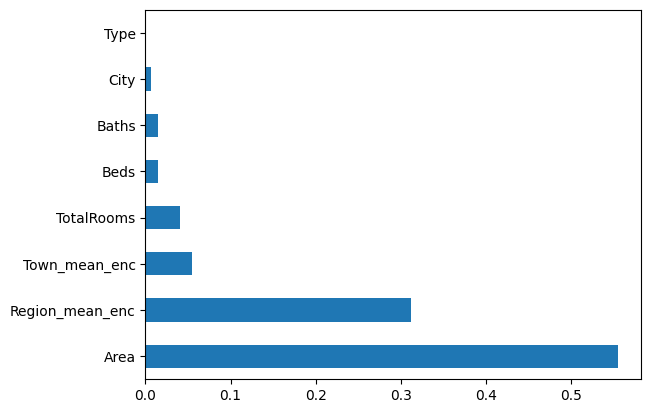

In [ ]:
feat_importances = pd.Series(rf_reg_gs.feature_importances_, index=rf_reg_gs.feature_names_in_)
feat_importances.nlargest(8).plot(kind='barh')
plt.show()

In [ ]:
feature_importances = gs.best_estimator_.feature_importances_
feature_importances

array([0.00073074, 0.00657277, 0.01514826, 0.01493377, 0.04064562,
       0.55482472, 0.05475993, 0.31238419])

In [ ]:
rf_reg_gs_feats = gs.best_estimator_
rf_reg_gs_feats.fit(X_train[['Area', 'Region_mean_enc', 'Town_mean_enc', 'TotalRooms']], y_train1p)
rf_reg_gs_feats_pred = np.expm1(rf_reg_gs_feats.predict(X_val[['Area', 'Region_mean_enc', 'Town_mean_enc', 'TotalRooms']]))
print(f"MAE:     {mean_absolute_error(y_val, rf_reg_gs_feats_pred)}")
print(f"RMSE:    {np.sqrt(mean_squared_error(y_val, rf_reg_gs_feats_pred))}")

MAE:     5606.968594454669
RMSE:    17011.153867761386


## SVR

In [ ]:
svr_reg = SVR(kernel='rbf', C=0.8)

svr_reg.fit(X_train, y_train1p)

svr_reg_pred = np.expm1(svr_reg.predict(X_val))
print(f"MAE:     {mean_absolute_error(y_val, svr_reg_pred)}")
print(f"RMSE:    {np.sqrt(mean_squared_error(y_val, svr_reg_pred))}")

MAE:     10556.935652410362
RMSE:    30119.77255403411


In [41]:
print(f"Actual Price \t Predicted Price")
for val, pred_val in zip(y_val[20:50], np.round(svr_reg_pred[20:50])):
    print(f"{val} \t {pred_val}")

Actual Price 	 Predicted Price
65000.0 	 30948.0
25000.0 	 22344.0
11000.0 	 13309.0
20000.0 	 17855.0
25000.0 	 33152.0
17000.0 	 14111.0
15000.0 	 15473.0
22000.0 	 20905.0
10000.0 	 15536.0
30000.0 	 22999.0
28000.0 	 31794.0
19000.0 	 30948.0
15000.0 	 14454.0
14000.0 	 12432.0
15000.0 	 15473.0
18000.0 	 13532.0
21000.0 	 30948.0
17000.0 	 15536.0
22000.0 	 18701.0
13500.0 	 13813.0
20000.0 	 28467.0
150000.0 	 143667.0
16000.0 	 12994.0
26000.0 	 20835.0
16000.0 	 12574.0
20000.0 	 14233.0
18000.0 	 14080.0
22000.0 	 25386.0
12000.0 	 15536.0
14000.0 	 20502.0


In [42]:
scoring = 'neg_mean_absolute_error'
param_grid = {'kernel': ['poly', 'rbf', 'sigmoid'],
          'C': range(1, 20, 5),
          'epsilon': np.arange(0.1, 1, 0.2).tolist(),
          'gamma': np.arange(1e-4, 1e-2, 0.002).tolist(),
          }

gs_svr = GridSearchCV(SVR(), param_grid, scoring=scoring, cv=3, 
                      refit=True, n_jobs=-1)

In [ ]:
gs_svr.fit(X_train, y_train1p)

In [ ]:
joblib.dump(gs_svr, '/content/drive/MyDrive/Dataset/bd_housing_data/gridsearch_svr_0_1_0.joblib')

In [ ]:
print(gs_svr.best_estimator_)
print(gs_svr.best_score_)
print(gs_svr.best_params_)

SVR(C=1)
-0.26756313796476733
{'C': 1, 'epsilon': 0.1, 'kernel': 'rbf'}


In [ ]:
svr_reg_gs = gs_svr.best_estimator_
svr_reg_gs.fit(X_train, y_train1p)

svr_reg_gs_pred = np.expm1(svr_reg_gs.predict(X_val))

In [ ]:
print(f"MAE:     {mean_absolute_error(y_val, svr_reg_gs_pred)}")
print(f"RMSE:    {np.sqrt(mean_squared_error(y_val, svr_reg_gs_pred))}")

MAE:     10547.390059438701
RMSE:    30151.141495721913
